## All necessary imports

In [1]:
import numpy as np
import pandas as pd

In [19]:
import matplotlib.pyplot as plt
# use plots style configuration from github
# plt.style.use('https://raw.githubusercontent.com/toftul/plt-styles-phys/main/phys-plots-sans.mplstyle')
plt.style.use("seaborn")
%config InlineBackend.figure_format = 'retina'  # resolution settings for plots

In [3]:
%matplotlib inline
import seaborn as sns

## Dataset
_**Heart Disease Cleveland UCI**_ – [kaggle.com](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)

### Features description

1. `age`: age in years
2. `sex`: sex (`1` = male; `0` = female)
3. `cp`: chest pain type (`0` = typical angina; `1` = atypical angina; `2` = non-anginal pain; `3` = asymptomatic)
4. `trestbps`: resting blood pressure (in _mmHg_ on admission to the hospital)
5. `chol`: serum cholestoral in _mg/dl_
6. `fbs`: (fasting blood sugar > _120 mg/dl_) (`1` = true; `0` = false)
7. `restecg`: resting electrocardiographic results
* `0`: normal;
* `1`: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of _>0.05 mV_);
* `2`: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. `thalach`: maximum heart rate achieved
9. `exang`: exercise induced angina (`1` = yes; `0` = no)
10. `oldpeak` = ST depression induced by exercise relative to rest
11. `slope`: the slope of the peak exercise ST segment (`0` = upsloping; `1` = flat; `2` = downsloping)
12. `ca`: number of major vessels (`0-3`) colored by flourosopy
13. `thal`: `0` = normal; `1` = fixed defect; `2` = reversable defect

`condition`: `0` = no disease, `1` = disease

## Exploratory data analysis (EDA)

In [4]:
heart_dis_data = pd.read_csv("heart_cleveland_upload.csv")
heart_dis_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
heart_dis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [30]:
heart_dis_data.shape

(297, 14)

In [6]:
pd.isnull(heart_dis_data).values.any()  # another way to check if there are no empty cells in the data frame

False

### Statistics with `.describe()`

In [8]:
heart_dis_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


#### Target value

In [27]:
ANSWERS = "condition"  # `0` = no disease, `1` = disease

#### Discrete-valued features

In [11]:
discrete_features = ["sex",       # 2. `1` = male; `0` = female
                     "cp",        # 3. chest pain type (`0` = typical angina; `1` = atypical angina; `2` = non-anginal pain; `3` = asymptomatic)
                     "fbs",       # 6. (fasting blood sugar > 120 mg/dl) (`1` = true; `0` = false)
                     "restecg",   # 7. resting electrocardiographic results (`0` = normal; `1` = having ST-T wave abnormality; `2` = showing probable or definite left ventricular hypertrophy by Estes' criteria)
                     "exang",     # 9. exercise induced angina (`1` = yes; `0` = no)
                     "slope",     # 11. the slope of the peak exercise ST segment (`0` = upsloping; `1` = flat; `2` = downsloping)
                     "ca",        # 12. number of major vessels (`0-3`) colored by flourosopy
                     "thal"       # 13. `0` = normal; `1` = fixed defect; `2` = reversable defect
                    ]

In [26]:
heart_dis_data[discrete_features].astype("category").describe()  # convert to categorical type before .describe() 

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,297,297,297,297,297,297,297,297
unique,2,4,2,3,2,3,4,3
top,1,3,0,0,0,0,0,0
freq,201,142,254,147,200,139,174,164


## Dataframe visualisations

#### _Disease or not disease?_

In [32]:
# pie-plot params
font_size = 12
ang_pie = 180
rad_pie = 1
no_disease_color = "lightgreen"
disease_color = "lightcoral"
no_disease_color_dark = "mediumseagreen"
disease_color_dark = "indianred"

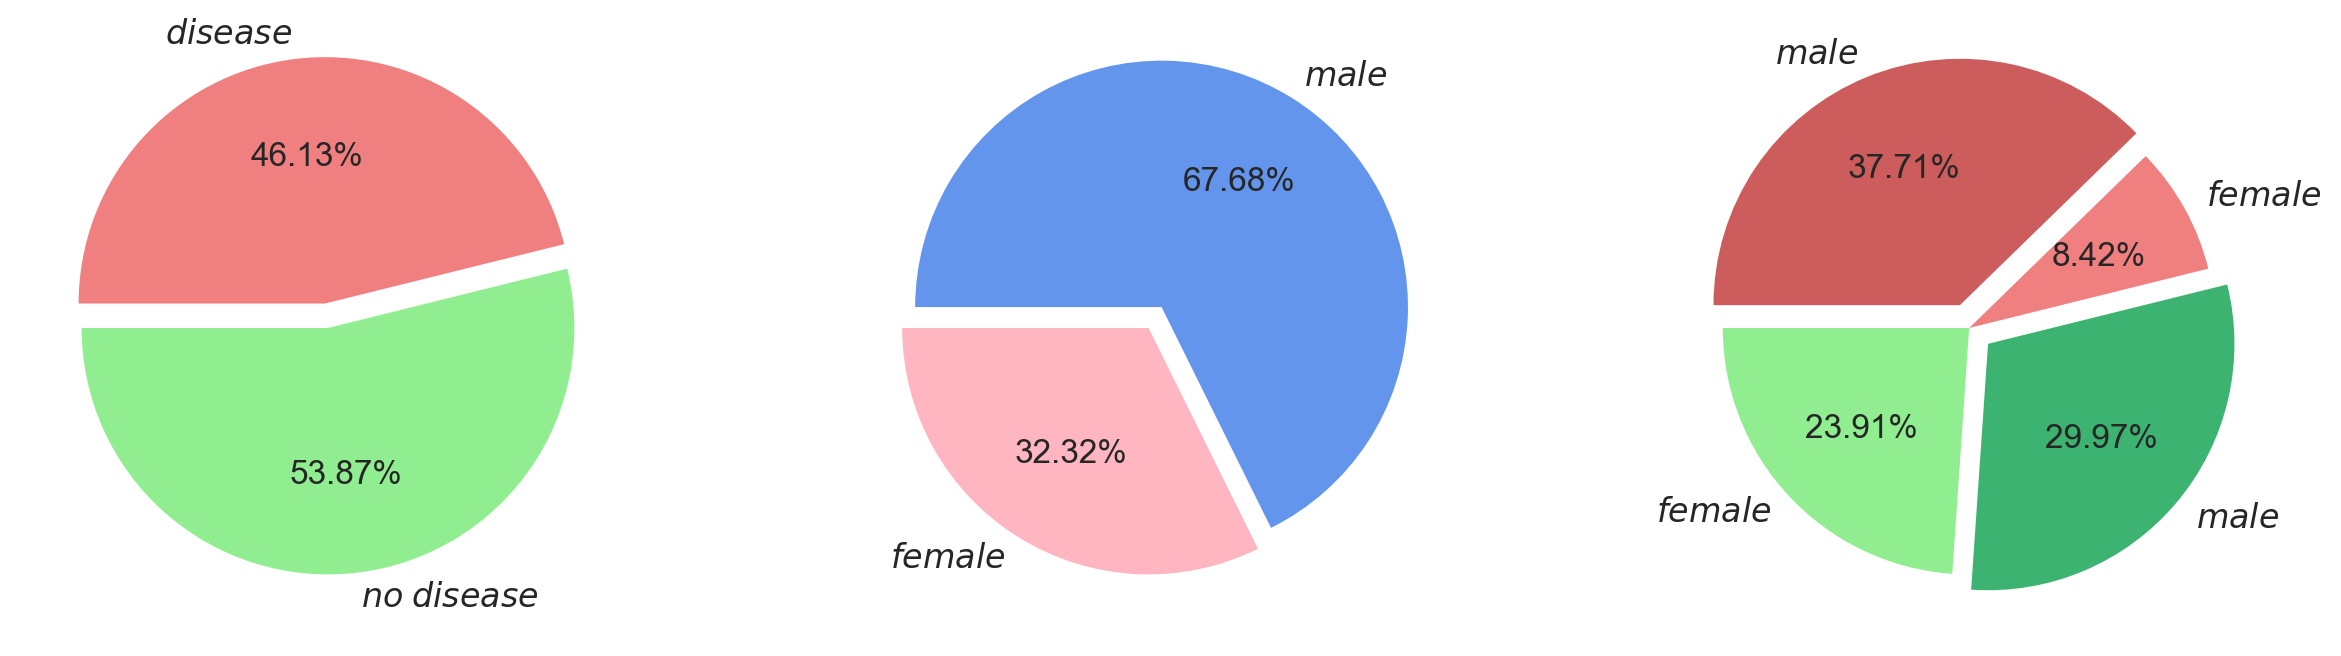

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 4)
# disease statistics
disease_stat = heart_dis_data.groupby([ANSWERS]).size()
ax1.pie(disease_stat, 
        labels=["$no\; disease$", "$disease$"],
        colors=[no_disease_color, disease_color],
        startangle=ang_pie, explode = (0, 0.1),
        autopct="%.2f%%", radius=rad_pie, textprops={"fontsize": font_size})
# sex statistics
sex_stat = heart_dis_data.groupby(["sex"]).size()
ax2.pie(sex_stat, 
        labels=["$female$", "$male$"],
        colors=["lightpink", "cornflowerblue"],
        startangle=ang_pie, explode = (0, 0.1),
        autopct="%.2f%%", radius=rad_pie, textprops={"fontsize": font_size})
# desease + sex statistics
disease_by_sex_stat = heart_dis_data.groupby([ANSWERS, "sex"]).size()
ax3.pie(disease_by_sex_stat, 
        labels=["$female$", "$male$", "$female$", "$male$"],
        colors=[no_disease_color, no_disease_color_dark, disease_color, disease_color_dark],
        startangle=ang_pie, explode = (0, 0.1, 0, 0.1),
        autopct="%.2f%%", radius=rad_pie, textprops={"fontsize": font_size})
plt.show()

#### Chest pain type

In [34]:
# colors parameters
typical_color = "lightskyblue"
atypical_color = "salmon"
non_anginal_color = "orchid"
asymptomatic_color = "gold"

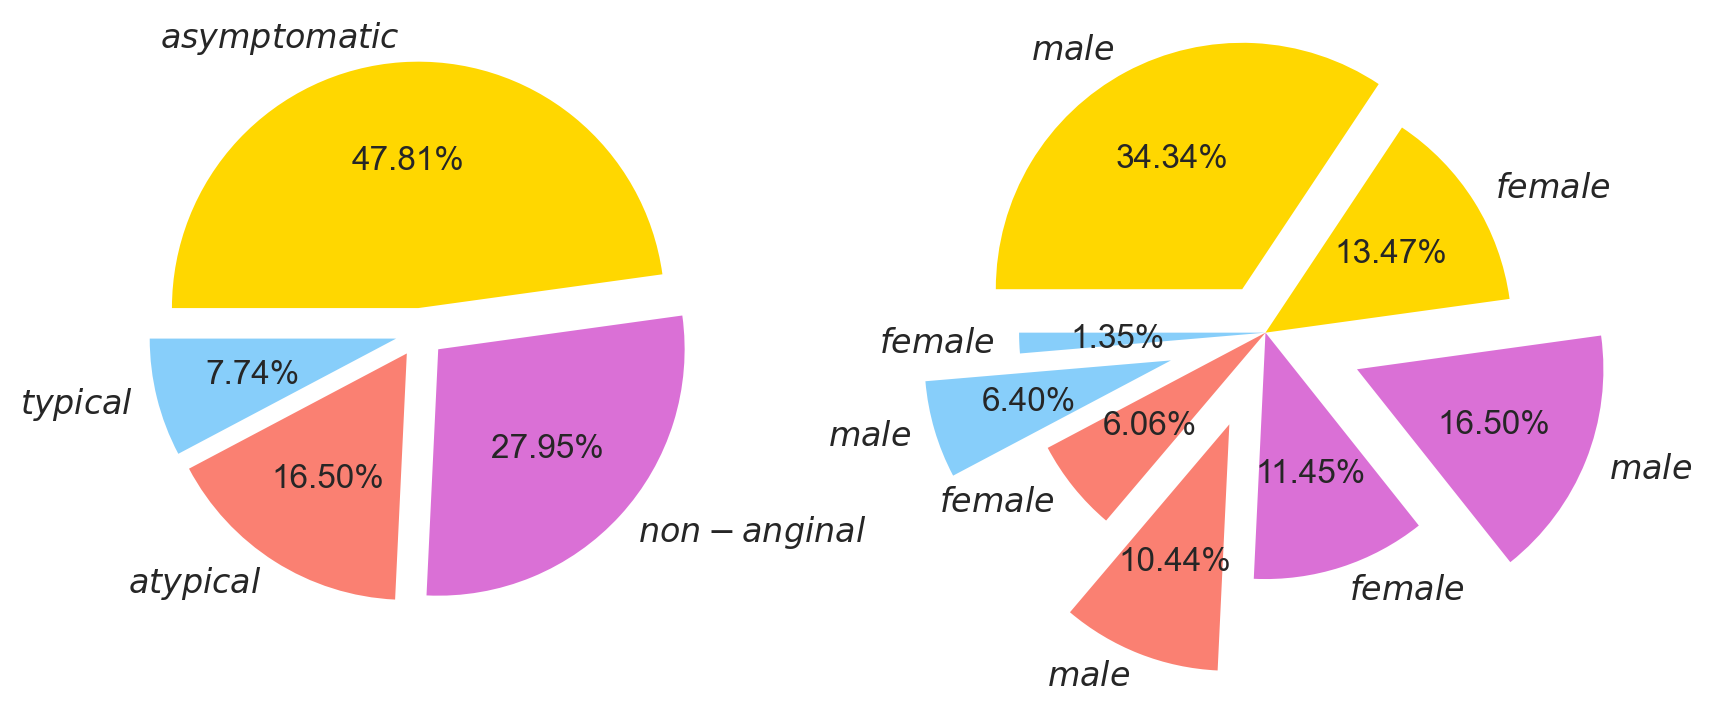

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
# chest pain type
pain_stat = heart_dis_data.groupby(["cp"]).size()
ax1.pie(pain_stat, 
        labels=["$typical$", "$atypical$", "$non-anginal$", "$asymptomatic$"],
        colors=[typical_color, atypical_color, non_anginal_color, asymptomatic_color],
        startangle=ang_pie,
        explode = (0.1, 0.1, 0.1, 0.1),
        autopct="%.2f%%", radius=rad_pie, textprops={"fontsize": font_size})
# chest pain + sex statistics
pain_by_sex_stat = heart_dis_data.groupby(["cp", "sex"]).size()
ax2.pie(pain_by_sex_stat, 
        labels=["$female$", "$male$", "$female$", "$male$", "$female$", "$male$", "$female$", "$male$"],
        colors=[typical_color, typical_color, atypical_color, atypical_color,
                non_anginal_color, non_anginal_color, asymptomatic_color, asymptomatic_color],
        startangle=ang_pie,
        explode = (0, 0.4, 0, 0.4, 0, 0.4, 0, 0.2),
        autopct="%.2f%%", radius=rad_pie, textprops={"fontsize": font_size})
plt.show()

#### Continuous-valued features

In [14]:
continuous_features = ["age",       # 1. age
                       "trestbps",  # 4. resting blood pressure in mmHg
                       "chol",      # 5. serum cholestoral in mg/dl
                       "thalach",   # 8. maximum heart rate achieved
                       "oldpeak"    # 10. ST depression induced by exercise relative to rest
                      ]

#### Plot pairwise relationships in a dataset

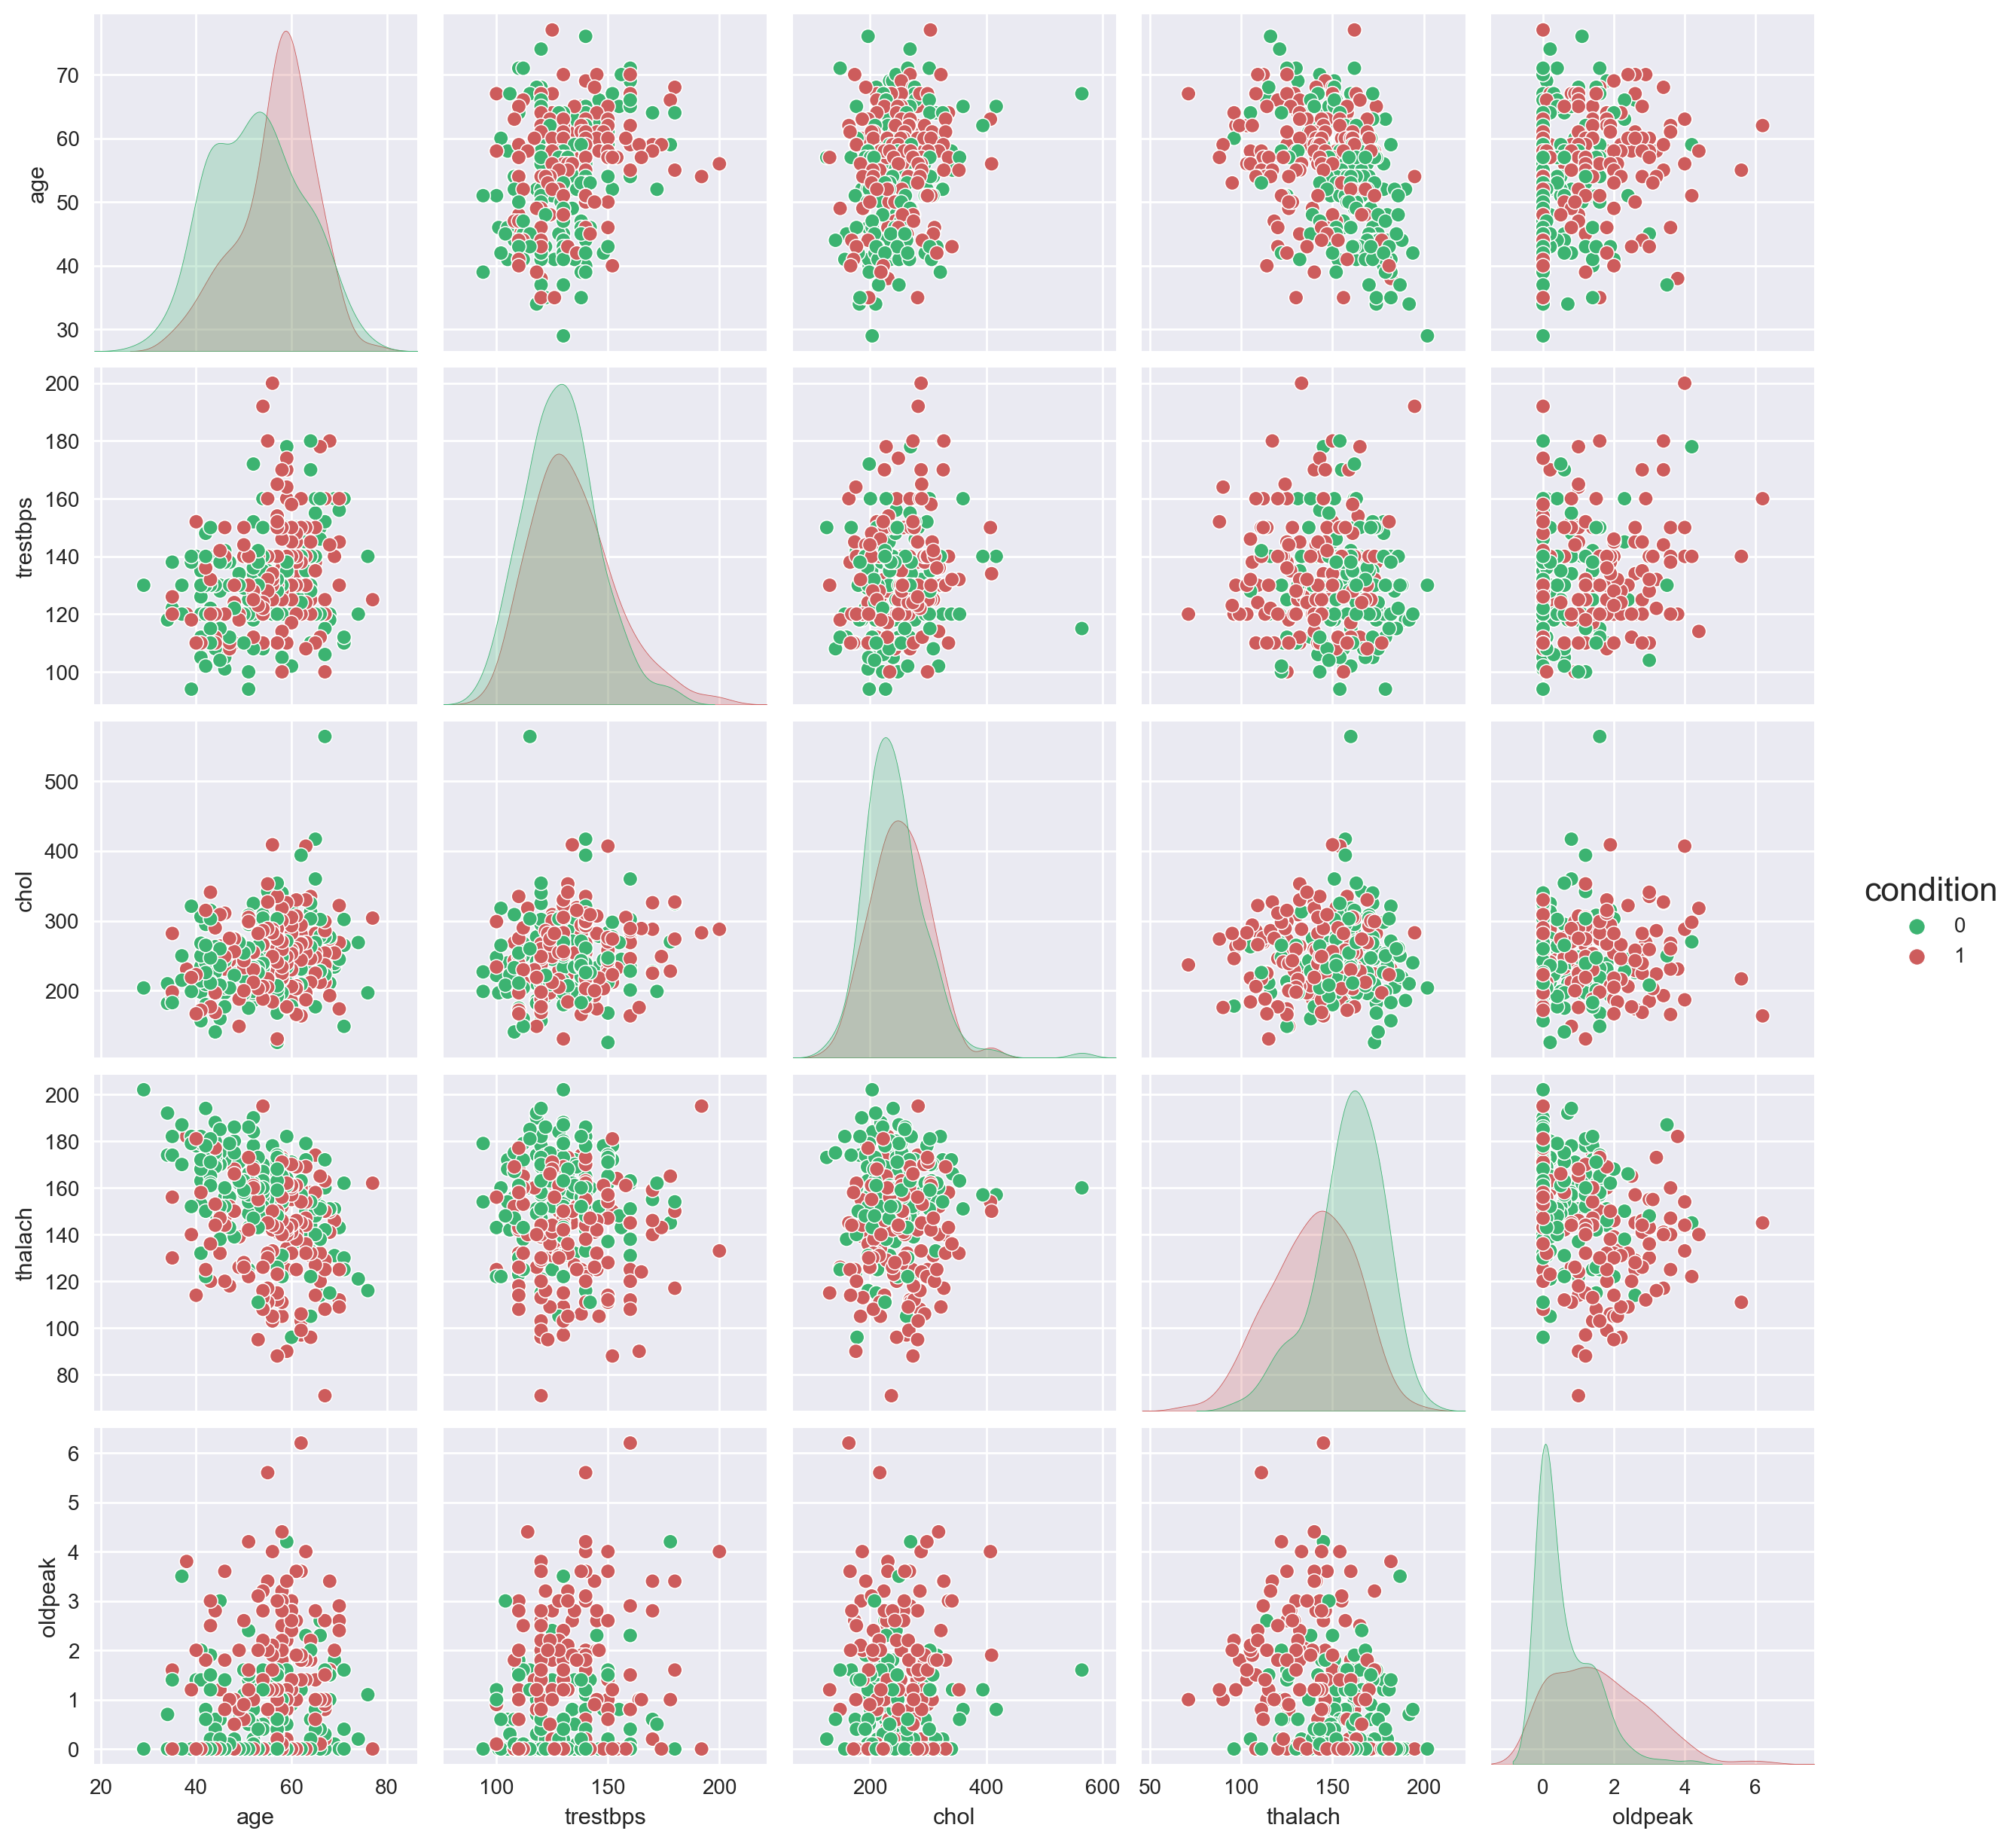

In [31]:
sns.pairplot(heart_dis_data, vars=continuous_features, hue=ANSWERS, 
             palette={0: no_disease_color_dark, 1: disease_color_dark})
plt.grid()
plt.show()